<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/60_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Mi Primera Red Neuronal - aprendiendo con Ringa Tech**
## **a. Programación Regular vs Aprendizaje Automático**


+ En la **programación regular** normalmente programamos algoritmoos para convertir entradas en resultados
  - Escribimos las reglas y la lógica necesarios para lograrlos
+ En el **Aprendizaje automático** funciona difrente. Tenemos las entradas y los resultados pero no necesariamnete conocemos cuales son las reglas para convertir las entradas en resultados.
  - No conecemos el algoritmos que pueda hacer esa conversión
  - Lo usamos cuando no conocemos la fromula o el algoritmo
+ Lo que queremos es crear un modelo que pueda tomar esas entradas y los resultados esperados de cada entrada y pueda aprender por si solo el algoritmo necesario que pueda hacer la conversión.

# **b. El Problema sencillo**
## **b1. El Problema**
+ **Problema. Quiero convertir grados Celsius a Fahrenheit**
$$ F = C*1.8+32$$

## **b2. Usando Programación regular**

In [10]:
## **b2. Usando Programación regular**
def F(C):
  F = C*1.8+32
  return F


## **b3. Veamos cuanto convierte 100°C**

In [11]:
## **b3. Veamos cuanto convierte 100°C**
C = float(input('Ingresa un valor de l temperatura en grados Celsius  '))
print(f'La temperatura {C}°Celsius es {F(C)} °Fahrenheit')


Ingresa un valor de l temperatura en grados Celsius  100
La temperatura 100.0°Celsius es 212.0 °Fahrenheit


# **c. Resolveremos el Problema usando Aprendizaje Automático coon Redes Neuronales**

## **c1. Nuestras librerias**

In [1]:
## **c1. Nuestras librerias**
import tensorflow as tf # libreria para IA hecha por google
import numpy as np

## **c2. Acerca de la  red Neuronal**
+ Una red Neuronal grande puede tener millones de neuronas conectadas y puede tomar decisiones muy complejas basadas en muchos datos y variables
+ Las redes neuronales siguen algunas reglas:
  - Se separan en capas, cada capa puede tener una o más neuronas
  - Cualquier red siempre tiene una capa de entrada que es donde se reciben los datos de entrada (grados Celsius a convertir) y una capa de salida (resultado calculado)
  - En redes mas complejas podemos tener mas capas intermedias llamadas capas ocultas.
  - Las neuronas se conectan con conexiones.
  - En el caso simple solo tenemos una conexión: Conectando Entrada con salida.
  - Cada una de las conexiones tiene un peso asignado y es un valor númerico que representa la importancia de la conexion con la neurona.
  - Cada neurona a excepcion de la capa de entrada tiene un sesgo que es un valor numerico-
  - Por último existe el concepto de funcion de activación.
  - Al inicializar la red, los pesos y el sesgo se inician de manera aleatoria
+ El papel del Aprendizaje automático aprenderá hacer esta conversión por si sola que los ajuste automaticamente

## **c3. Estos son nuestros datos con los cuales entrenaremos a nuestra red Neuronal**

In [3]:
## **c3. Estos son nuestros datos con los cuales entrenaremos a nuestra red Neuronal**
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float) # datos o neurona de entrada
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float) #Datos o neurona de salida

## **c4. Modelo de Red Neuronal a construir**
+ El Framework _keras_ nos permite hacer la red de manera simple, nos ahorra muchas lineas de código.
+ En _keras_ puedo especificar las dos capas de entrada y salida por separado o puedo ahorrarme un paso y solo especificar la capa de salida.
+ La variable _capa_ se inicia como una capa densa que tienen conexiones desde cada neurona hacia todas las neurnas da cada capa

In [4]:
## **c4. Modelo de Red Neuronal a construir**
capa = tf.keras.layers.Dense(units=1, input_shape=[1]) # Capa de salida (units=1), con una capa de salida (input_shape=[1])

modelo = tf.keras.Sequential([capa]) # secuencial es para redes sencillas

## **c5. Preparemos el modelo para ser entrenado**
+ optimizador = Adam le permite a la red como ajustar los pesos y sesgo de manera eficiente para que aprenda progresivamente
+ 0.1 es la tasa de aprendizaje, no debe ser ni muy pequeño ni muy grande
+ 'mean_squared_error' # Una poca cantidad de errores grande e speor que una gran cantidad de errores pequeño

In [5]:
## **c5. Preparemos el modelo para ser entrenado**
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1), # Adam le permite a la red como ajustar los pesos para que aprenda progresivamente
    loss = 'mean_squared_error' # Una poca cantidad de errores grande e speor que una gran cantidad de errores pequeño

)

## **c6. Vamos a entrenar el modelo**
+ _modelo.fit(celsius,fahrenheit, epochs =1000, verbose = False)_
+_celsius # Entrada
+ fahrenheit (salida)
+ epochs =1000 (Cuantos intentos) para que se optimice
+ verbose = False para que no imprima basura

In [7]:
## **c6. Vamos a entrenar el modelo**
print('Comenzando el entrenamiento...')
historial = modelo.fit(celsius,fahrenheit, epochs =1000, verbose = False)
print('Modelo Entrenado')

Comenzando el entrenamiento...
Modelo Entrenado


## **c7. Resultados de la función de pérdida**
+ Que tan mal estan los resultados de la red en cada vuelta que dió
+ Se observa que despues de 500 vueltas el error ya es cero, despues de 500 el modelo ya no mejoa mucho.

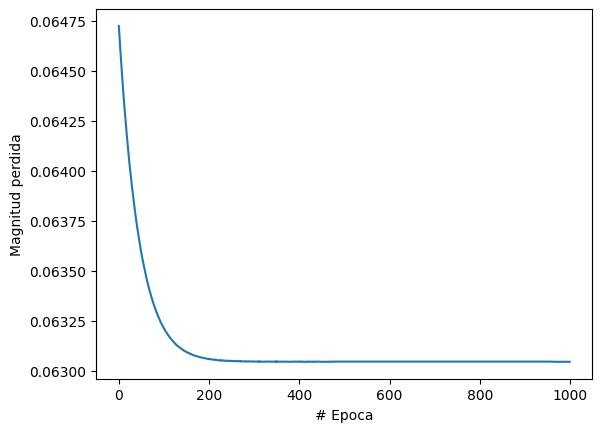

In [8]:
## **c7. Resultados de la función de pérdida**
import matplotlib.pyplot as plt
plt.xlabel('# Epoca')
plt.ylabel('Magnitud perdida')
plt.plot(historial.history['loss'])

## **c8. Hagamos una predicción para 100°C**

In [32]:
## **c8. Hagamos una predicción para 100°C**
print('Hagamos una prediccion!')
resultado = modelo.predict([100.0])
print('El resultado predicho por la red es' , resultado , 'fahrenheit' )
print(f'La temperatura real {100}°Celsius es {F(100)} °Fahrenheit')


Hagamos una prediccion!
1/1 [==============================] - 0s 66ms/step
El resultado predicho por la red es [[211.74744]] fahrenheit
La temperatura real 100°Celsius es 212.0 °Fahrenheit


## **c9. Estructura interna de la red - Peso y Sesgo**

In [13]:
## **c9. Estructura interna de la red - Peso y Sesgo**
print('Variables internas del modelo')
print('peso y sesgo', capa.get_weights())

Variables internas del modelo
peso y sesgo [array([[1.7979496]], dtype=float32), array([31.952477], dtype=float32)]


## **c10. Asi funciona la red creada = Formula creada**
### **Predicción por la red** $100*1.7984444 + 31.895525 = 211.73969$
### **Usando la Formula Real**$$Fahrenheit = Celsius*1.8+32 = 100*1.8+32 = 212$$

# **d. Una red mas compleja**

# **d1. Vamos agregar dos capas intermedias ocultas cada una de ellas con 3 neuronas**
+ oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
+ oculta2 = tf.keras.layers.Dense(units=3)
+ salida = tf.keras.layers.Dense(units=1)
+ modelo2 = tf.keras.Sequential([oculta1, oculta2, salida])

# **d1. Vamos agregar dos capas ocultas cada una de ellas con 3 neuronas**

In [33]:
# **d1. Vamos agregar dos capas ocultas cada una de ellas con 3 neuronas**
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo2 = tf.keras.Sequential([oculta1, oculta2, salida])

## **d2. Preparemos el modelo para ser entrenado**

In [34]:
## **d2. Preparemos el modelo para ser entrenado**
modelo2.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'

)

## **d3. Vamos a entrenar el modelo con dos capas ocultas**

In [35]:
## **d3. Vamos a entrenar el modelo con dos capas ocultas**
print('Comenzando el entrenamiento...')
historial = modelo2.fit(celsius,fahrenheit, epochs =1000, verbose = False)
print('Modelo Entrenado')

Comenzando el entrenamiento...
Modelo Entrenado


## **d4. Resultados de la función de pérdida con dos capas ocultas**
+ Que tan mal estan los resultados de la red en cada vuelta que dió
+ Se observa que despues de 50 vueltas el error ya es cero el modelo no aprendió mas.

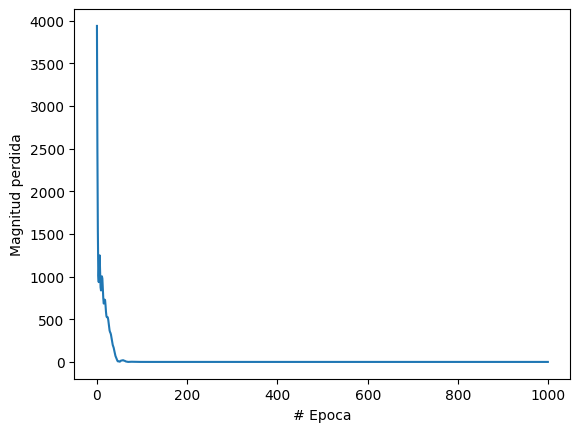

In [36]:
## **d4. Resultados de la función de pérdida con dos capas ocultas**
import matplotlib.pyplot as plt
plt.xlabel('# Epoca')
plt.ylabel('Magnitud perdida')
plt.plot(historial.history['loss'])

## **d5. Hagamos una predicción para 100°C**

In [39]:
## **d5. Hagamos una predicción para 100°C**
print('Hagamos una prediccion!')
resultado2 = modelo2.predict([100.0])
resultado1 = modelo.predict([100.0])
print('El resultado predicho por la red con el primer modelo es ' , resultado1 , 'fahrenheit' )
print('El resultado predicho por la red con el segundo modelo es ' , resultado2 , 'fahrenheit' )
print(f'La temperatura real {100}°Celsius es {F(100)} °Fahrenheit')


Hagamos una prediccion!
1/1 [==============================] - 0s 46ms/step
El resultado predicho por la red con el primer modelo es  [[211.74744]] fahrenheit
El resultado predicho por la red con el segundo modelo es  [[211.74748]] fahrenheit
La temperatura real 100°Celsius es 212.0 °Fahrenheit


## **d6. Red Neuronal2 Estructura interna de la red**

In [40]:
## **d6. Red Neuronal2 Estructura interna de la red**
print('Variables internas del modelo')
print('peso y sesgo', oculta1.get_weights())
print('peso y sesgo', oculta2.get_weights())
print('peso y sesgo', salida.get_weights())

Variables internas del modelo
peso y sesgo [array([[ 0.15062603,  0.94732136, -0.14305001]], dtype=float32), array([-2.1947281,  4.6867886, -4.6983275], dtype=float32)]
peso y sesgo [array([[ 0.2107742 ,  0.56624395,  0.08687732],
       [ 0.14157832, -1.4193287 ,  0.834897  ],
       [ 0.10021985,  1.6176919 ,  0.55475056]], dtype=float32), array([ 3.1516726, -4.7087426, -2.4375563], dtype=float32)]
peso y sesgo [array([[ 0.4170838 ],
       [-1.2947772 ],
       [-0.26958057]], dtype=float32), array([4.234576], dtype=float32)]
